<a href="https://colab.research.google.com/github/cbird808/Protocols/blob/master/Copy_of_colab_R_quickstart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# R in Google Colab Quick Start

Here’s how you can get up and running with R inside a Google Colab notebook:

---

## Create a new Colab notebook

Go to https://colab.research.google.com and click File → New notebook.

---

## Install R and the Python ↔ R bridge
   In the first code cell, install R itself (via apt) and the rpy2 package (which provides the %%R magic):

In [ ]:
!apt-get update -qq
!apt-get install -y r-base
!pip install -q rpy2


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
r-base is already the newest version (4.5.0-2.2204.0).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


---

## Enable the R magic
In the next cell, load the IPython extension so you can write R directly:

In [ ]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


---

## Run R code cells
Now any cell that begins with %%R will be interpreted as R. For example:

In [ ]:
%%R
# Basic R example
x <- rnorm(100)
summary(x)


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-2.854202 -0.717171  0.046773  0.003118  0.723251  2.629340 


---

## Install CRAN Packages

Installing packages is quick and easy.

In [ ]:
%%R
# Install and load packages
install.packages("tidyverse", repos="https://cloud.r-project.org")
library(tidyverse)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cloud.r-project.org/src/contrib/tidyverse_2.0.0.tar.gz'
Content type 'application/x-gzip' length 704618 bytes (688 KB)
downloaded 688 KB


The downloaded source packages are in
	‘/tmp/Rtmp213HUM/downloaded_packages’


In [ ]:
%%R
# Install remotes
install.packages("remotes")
library(remotes)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/remotes_2.5.0.tar.gz'
Content type 'application/x-gzip' length 164496 bytes (160 KB)
downloaded 160 KB


The downloaded source packages are in
	‘/tmp/Rtmp213HUM/downloaded_packages’


---

## Install Packages from GitHub


In [ ]:
%%R
# Install remotes from CRAN first
install.packages("remotes")
library(remotes)

# Example: install the 'vegan' package directly from its GitHub repo
remotes::install_github("vegandevs/vegan")
library(vegan)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/remotes_2.5.0.tar.gz'
Content type 'application/x-gzip' length 164496 bytes (160 KB)
downloaded 160 KB


The downloaded source packages are in
	‘/tmp/Rtmp213HUM/downloaded_packages’
Skipping install of 'vegan' from a github remote, the SHA1 (1ef99e14) has not changed since last install.
  Use `force = TRUE` to force installation


---

## Install Packages from Bioconductor

In [ ]:
%%R
# Install BiocManager from CRAN first
install.packages("BiocManager", repos="https://cloud.r-project.org")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cloud.r-project.org/src/contrib/BiocManager_1.30.25.tar.gz'
Content type 'application/x-gzip' length 593414 bytes (579 KB)
downloaded 579 KB


The downloaded source packages are in
	‘/tmp/Rtmp213HUM/downloaded_packages’


In [ ]:
%%R
# after initiating, wait for the prompt below, Update all/some/none? [a/s/n]:
BiocManager::install("Biostrings")
library(Biostrings)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com
Bioconductor version 3.21 (BiocManager 1.30.25), R 4.5.0 (2025-04-11)
In addition: Warning message:
package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'Biostrings' 


---

## Pass data between Python and R
You can send Python variables into R and bring results back. For example:



In [ ]:
import numpy as np
data = np.random.randn(50)

In [ ]:
%%R -i data -o mean_data
# '-i data' imports the Python variable `data`
# '-o mean_data' outputs the R variable `mean_data` to Python
mean_data <- mean(data)


In [ ]:
print("Mean computed in R and output to Python:", mean_data)

Mean computed in R and output to Python: [-0.09641518]


---

## Alternative: Run pure R scripts in `bash`
If you prefer a “bash + Rscript” approach, you can also do:

In [ ]:
%%bash
Rscript -e "print(summary(rnorm(100)))"

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-2.04305 -0.81976 -0.01719  0.04055  0.79888  2.85697 


## Plotting

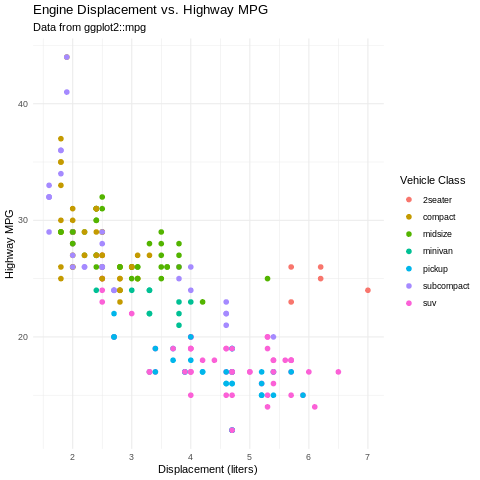

In [ ]:
%%R
# tidyverse was installed an loaded above

# Quick scatterplot of engine displacement vs highway mpg, colored by vehicle class
ggplot(mpg, aes(x = displ, y = hwy, color = class)) +
  geom_point(size = 2) +
  labs(
    title = "Engine Displacement vs. Highway MPG",
    subtitle = "Data from ggplot2::mpg",
    x = "Displacement (liters)",
    y = "Highway MPG",
    color = "Vehicle Class"
  ) +
  theme_minimal()
